In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,15

dataset = pd.read_csv("updata.csv")
# Parse strings to datetime type
dataset['Date and Time'] = pd.to_datetime(dataset['Date and Time'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Date and Time'])

from datetime import datetime
indexedDataset.head(40)

,UP_DMD
Date and Time,
2014-01-01 00:00:00,9437
2014-01-01 00:15:00,9602
2014-01-01 00:30:00,9575
2014-01-01 00:45:00,9459
2014-01-01 01:00:00,9384
2014-01-01 01:15:00,9303
2014-01-01 01:30:00,9137
2014-01-01 01:45:00,9027
2014-01-01 02:00:00,8939


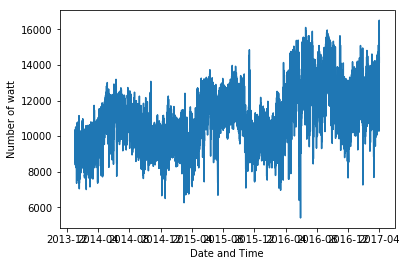

In [2]:
plt.xlabel("Date and Time")
plt.ylabel("Number of watt")
plt.plot(indexedDataset)

In [4]:
#Determing rolling statistics
rolmean = indexedDataset.rolling(window=365).mean()
rolstd = indexedDataset.rolling(window=365).std()
print(rolmean, rolstd)

                           UP_DMD
Date and Time                    
2014-01-01 00:00:00           NaN
2014-01-01 00:15:00           NaN
2014-01-01 00:30:00           NaN
2014-01-01 00:45:00           NaN
2014-01-01 01:00:00           NaN
2014-01-01 01:15:00           NaN
2014-01-01 01:30:00           NaN
2014-01-01 01:45:00           NaN
2014-01-01 02:00:00           NaN
2014-01-01 02:15:00           NaN
2014-01-01 02:30:00           NaN
2014-01-01 02:45:00           NaN
2014-01-01 03:00:00           NaN
2014-01-01 03:15:00           NaN
2014-01-01 03:30:00           NaN
2014-01-01 03:45:00           NaN
2014-01-01 04:00:00           NaN
2014-01-01 04:15:00           NaN
2014-01-01 04:30:00           NaN
2014-01-01 04:45:00           NaN
2014-01-01 05:00:00           NaN
2014-01-01 05:15:00           NaN
2014-01-01 05:30:00           NaN
2014-01-01 05:45:00           NaN
2014-01-01 06:00:00           NaN
2014-01-01 06:15:00           NaN
2014-01-01 06:30:00           NaN
2014-01-01 06:

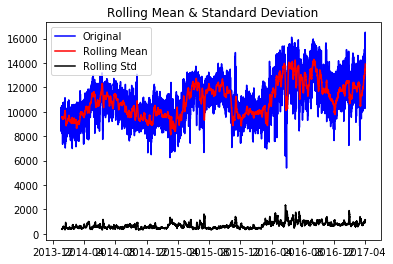

In [5]:
#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['UP_DMD'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:


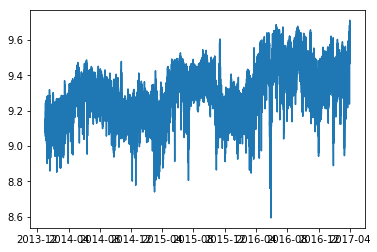

In [6]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

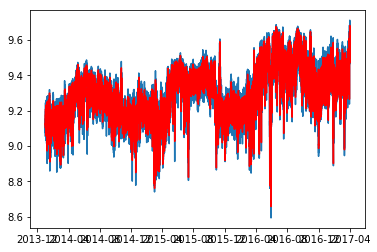

In [7]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=365).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [8]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,UP_DMD
Date and Time,
2014-01-01 02:45:00,-0.025712
2014-01-01 03:00:00,-0.020144
2014-01-01 03:15:00,-0.021446
2014-01-01 03:30:00,-0.004420
2014-01-01 03:45:00,0.000862
2014-01-01 04:00:00,0.011638
2014-01-01 04:15:00,0.009179
2014-01-01 04:30:00,0.028801
2014-01-01 04:45:00,0.048717


In [9]:
 from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['UP_DMD'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

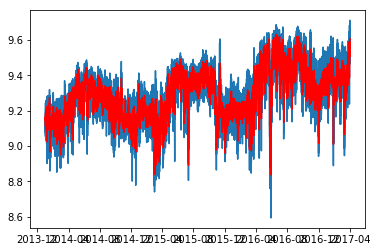

In [10]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

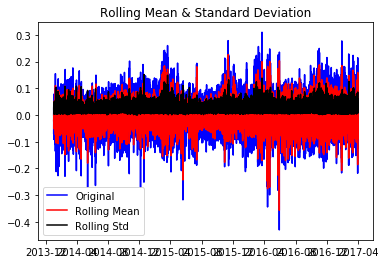

Results of Dickey-Fuller Test:
Test Statistic                    -71.877401
p-value                             0.000000
#Lags Used                         70.000000
Number of Observations Used    113785.000000
Critical Value (1%)                -3.430407
Critical Value (5%)                -2.861565
Critical Value (10%)               -2.566784
dtype: float64


In [11]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

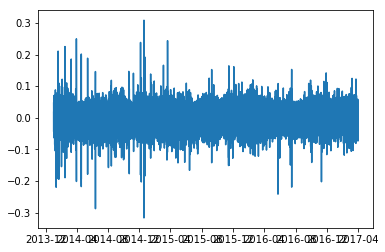

In [12]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

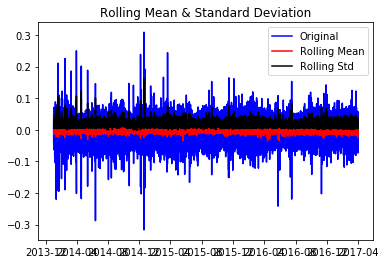

Results of Dickey-Fuller Test:
Test Statistic                    -65.889811
p-value                             0.000000
#Lags Used                         70.000000
Number of Observations Used    113784.000000
Critical Value (1%)                -3.430407
Critical Value (5%)                -2.861565
Critical Value (10%)               -2.566784
dtype: float64


In [13]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [14]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(indexedDataset_logScale)

#trend = decomposition.trend
#seasonal = decomposition.seasonal
#plt.subplot(411)
#plt.plot(indexedDataset_logScale, label='Original')
#plt.legend(loc='best')
#plt.subplot(412)
#plt.plot(trend, label='Trend')
#plt.legend(loc='best')
#plt.subplot(413)
#plt.plot(seasonal,label='Seasonality')
#plt.legend(loc='best')
#plt.subplot(414)
#plt.plot(residual, label='Residuals')
#plt.legend(loc='best')
#plt.tight_layout()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [15]:
#decomposedLogData = residual
#decomposedLogData.dropna(inplace=True)
#test_stationarity(decomposedLogData)

NameError: name 'residual' is not defined

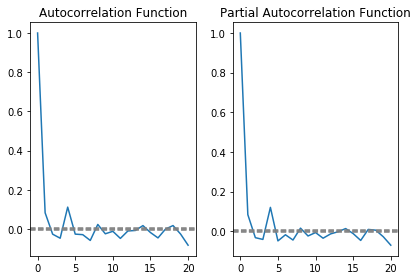

In [16]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


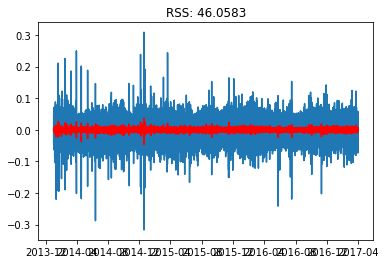

In [37]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["UP_DMD"])**2))
print('Plotting AR model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


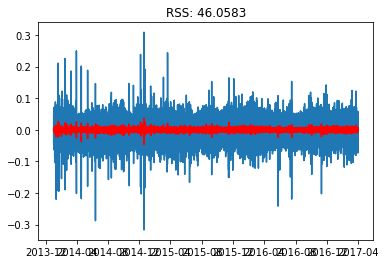

In [18]:
from statsmodels.tsa.arima_model import ARIMA
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
#model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["UP_DMD"])**2))
print('Plotting AR model')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5,1,'RSS: nan')

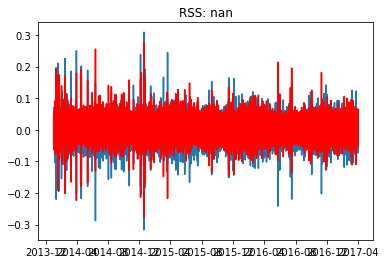

In [39]:
model = ARIMA(indexedDataset_logScale, order=(2, 2, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["UP_DMD"])**2))

In [20]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date and Time
2014-01-01 00:15:00    0.000004
2014-01-01 00:30:00    0.001583
2014-01-01 00:45:00   -0.001266
2014-01-01 01:00:00   -0.001568
2014-01-01 01:15:00    0.000905
dtype: float64


In [21]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date and Time
2014-01-01 00:15:00    0.000004
2014-01-01 00:30:00    0.001586
2014-01-01 00:45:00    0.000320
2014-01-01 01:00:00   -0.001247
2014-01-01 01:15:00   -0.000343
dtype: float64


In [23]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['UP_DMD'].ix[0], index=indexedDataset_logScale['UP_DMD'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date and Time
2014-01-01 00:00:00    9.152393
2014-01-01 00:15:00    9.152397
2014-01-01 00:30:00    9.153980
2014-01-01 00:45:00    9.152714
2014-01-01 01:00:00    9.151146
dtype: float64

Text(0.5,1,'RMSE: 1646.1716')

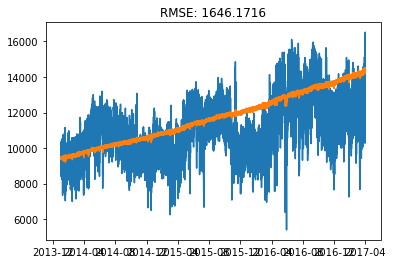

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset["UP_DMD"])**2)/len(indexedDataset["UP_DMD"])))